In [1]:
import sys
sys.path.append('/workspace/user_data')

In [2]:
import planetengine
import os
from underworld import function as fn
import numpy as np
import math
import matplotlib
%matplotlib inline

In [3]:
def domFreqFunc(system):
    gradFunc = fn.math.dot(system.mesh.unitvec_r_Fn, system.temperatureField.fn_gradient)
    Nus = gradFunc.evaluate(system.outer)
    Nus = (Nus - np.average(Nus)) / np.average(Nus)
    sp = np.abs(np.fft.rfft(Nus, axis = 0))
    freq = np.fft.rfftfreq(Nus.size, 1. / (2. * sp.size))
    domFreq = int(max(zip(sp[:,0], freq))[1])
    return domFreq

In [4]:
def NusProfile(system):
    gradFunc = fn.math.dot(system.mesh.unitvec_r_Fn, system.temperatureField.fn_gradient)
    Nus = gradFunc.evaluate(system.outer)
    Nus = (Nus - np.average(Nus)) / np.average(Nus)
    plt.plot(Nus)
    plt.show()

In [5]:
outputPath = '/workspace/user_data/data/donutfrequency'

In [6]:
modelNames = [os.path.splitext(os.path.splitext(item)[0])[0] for item in os.listdir(outputPath)]

In [8]:
models = []
for modelName in modelNames:
    models.append(planetengine.frame.load_frame(outputPath, modelName, 'max'))
tosort = []
for model in models:
    tosort.append((model, model.params['Ra'], model.params['f']))
tosort = sorted(tosort, key=lambda tup: (tup[1], tup[2]))
models = [row[0] for row in tosort]
suiteDict = {}
for model in models:
    suiteDict[model.instanceID] = model

Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 00007000
Found checkpoint: 00000000
Found checkpoint: 00008000
Found checkpoint: 00001000
Found checkpoint: 00010001
Found checkpoint: 00002000
Found checkpoint: 00003000
Loading checkpoint...
Loading substrate from disk: mesh
Loading var from disk: temperatureField
Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior fram

Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 00007000
Found checkpoint: 00000000
Found checkpoint: 00008000
Found checkpoint: 00001000
Found checkpoint: 00010001
Found checkpoint: 00002000
Found checkpoint: 00003000
Loading checkpoint...
Loading substrate from disk: mesh
Loading var from disk: temperatureField
Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 000

Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 00007000
Found checkpoint: 00000000
Found checkpoint: 00008000
Found checkpoint: 00001000
Found checkpoint: 00010001
Found checkpoint: 00002000
Found checkpoint: 00003000
Loading checkpoint...
Loading substrate from disk: mesh
Loading var from disk: temperatureField
Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff 

Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 00007000
Found checkpoint: 00000000
Found checkpoint: 00008000
Found checkpoint: 00001000
Found checkpoint: 00010001
Found checkpoint: 00002000
Found checkpoint: 00003000
Loading checkpoint...
Loading substrate from disk: mesh
Loading var from disk: temperatureField
Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation comp

Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 00007000
Found checkpoint: 00000000
Found checkpoint: 00008000
Found checkpoint: 00001000
Found checkpoint: 00010001
Found checkpoint: 00002000
Found checkpoint: 00003000
Loading checkpoint...
Loading substrate from disk: mesh
Loading var from disk: temperatureField
Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 000

Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Found checkpoint: 00006000
Found checkpoint: 00009000
Found checkpoint: 00005000
Found checkpoint: 00004000
Found checkpoint: 00007000
Found checkpoint: 00000000
Found checkpoint: 00008000
Found checkpoint: 00001000
Found checkpoint: 00010001
Found checkpoint: 00002000
Found checkpoint: 00003000
Loading checkpoint...
Loading substrate from disk: mesh
Loading var from disk: temperatureField
Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Tar found - unarchiving...
Unarchived.
Building frame...
Mak

Reporting...
Analysing...
Analysis complete!
avTemp 0.22
modeltime 7.9E-01
Nu 1.6
step 10001
surfVRMS 53.58
VRMS 38.58
fig



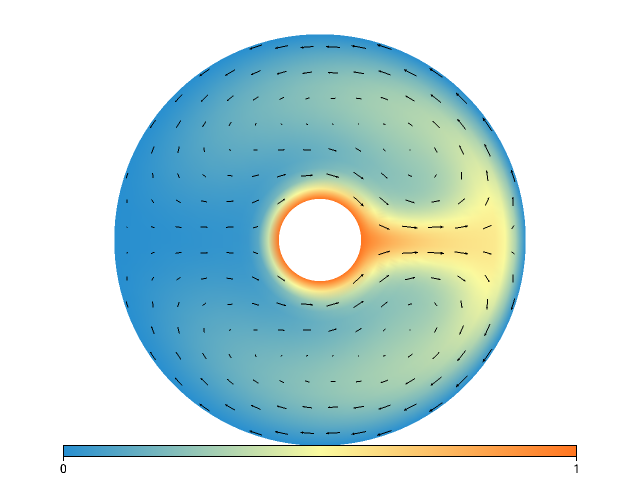

Reporting complete!


NameError: name 'plt' is not defined

In [12]:
for model in models:
    model.report()
    NusProfile(model.system)

In [ ]:
domFreqData = {}
for model in models:
    Ra = model.params['Ra']
    RaPow = int(math.log(Ra / 1e4, 2))
    if not RaPow in domFreqData:
        domFreqData[RaPow] = []
    f = model.params['f']
    domFreq = domFreqFunc(model.system)
    domFreqData[RaPow].append((f, domFreq))
for key in domFreqData:
    domFreqData[key] = sorted(domFreqData[key])
    domFreqData[key] = np.array(domFreqData[key]).transpose()

In [ ]:
# plt.scatter(
#     x = [item[0] for item in domFreqData],
#     y = [item[2] for item in domFreqData],
#     c = [item[1] for item in domFreqData],
#     )
# cbar = plt.colorbar(freqPlot)
# # plt.xlabel('Ra (powers of 2 from 1e4)')
# # plt.ylabel('dominant angular frequency')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.xlim(0., 1.)
plt.ylim(0., 13.)
for key, val in sorted(domFreqData.items()):
    ax.plot(val[0], val[1])
ax.set_xlabel('f (squareness)')
ax.set_ylabel('Dominant frequency')
legend = plt.figlegend(domFreqData.keys())

In [9]:
figs = []
for model in models:
    name = model.instanceID
    fig = planetengine.visualisation.QuickFig(
        model.system.temperatureField,
        colourBar = False,
        edgecolour = 'black',
        facecolour = 'black'
        )
    figs.append(fig)

Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 variables to the figure.
Fitted 1 varia

In [11]:
figsDir = os.path.join(outputPath, 'allfigs')
basefilename = 'fig_'
for index, fig in enumerate(figs):
    num = str(index).zfill(3)
    filename = basefilename + num
    fig.save(os.path.join(figsDir, filename))